In [32]:
#项目6-项目实训代码

import pandas as pd
import numpy as np

#读取数据并将数据集拆分为特征变量（data）与标签（target）
data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target=raw_df.values[1::2,2]

#将特征变量（data）与标签（target）分别赋值给x和y
x,y=data,target
print('数据集特征变量：')
print(x)
print('数据集标签值：')
print(y)

数据集特征变量：
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
数据集标签值：
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 1

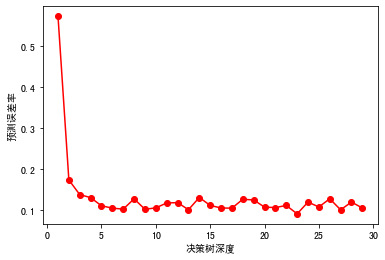

In [33]:
#确定最佳的决策树深度值
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

#分割数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=50) 

#决策树深度与模型预测误差率计算
depth=np.arange(1,30)
err_list=[]
for i in depth:
    model=DecisionTreeRegressor(max_depth=i)
    model.fit(x_train,y_train)
    r2=model.score(x_test,y_test)
    err=1-r2
    err_list.append(err)
#绘制决策树深度与模型预测误差率图形
plt.plot(depth,err_list,'ro-')
plt.rcParams['font.sans-serif']='Simhei'
plt.xlabel('决策树深度')
plt.ylabel('预测误差率')
plt.show()

In [34]:
#当决策树为5时，训练模型
model=DecisionTreeRegressor(max_depth=5)
model.fit(x_train,y_train)
scores=model.score(x_test,y_test)
print(scores)

0.8891463100747867
